# Tensorflow, Keras and MNIST
#### David Gallagher

### Brief Introduction.

This notebook documents and outlines research into building a Neural Network (NN) using Tensorflow with Keras and MNIST as training data. The NN will be used to predict numbers given to it from a [web client](https://github.com/d-gallagher/ET_Jupyter) wherein users will draw digits on a canvas.

#### Research into [Tensorflow](https://www.tensorflow.org/), and [Keras](https://keras.io/).
##### Tensorflow
An open source library for numerical computation and large-scale machine learning developed by the [Google Brain team](https://ai.google/research/teams/brain/). Tensorflow is a framework which combines a number of useful machine learning and deep learning models and algorithms. It uses [Python](https://www.python.org/) for building applications and executes those applications in C++ making it highly performant. Tensorflow is available for deep neural network applications based in [Image Recognition](https://www.tensorflow.org/tutorials/images/classification), [Language Processing](https://www.tensorflow.org/tutorials/text/word_embeddings) and [Handwritten digit recognition](https://www.tensorflow.org/js/tutorials/training/handwritten_digit_cnn) to name a few.

##### Keras
Keras is one of the leading high-level neural networks APIs, written in [Python](https://www.python.org/) and runs on top of the aforementioned [Tensorflow](https://www.tensorflow.org/), [Theano](http://deeplearning.net/software/theano/) and other deep learning frameworks. Originally developed by François Chollet, an engineer at Google, to be modular, minimalist, extensible and Python specific. It is set to be fully adopted by the upcoming [Tensorflow 2.0](https://www.tensorflow.org/guide/effective_tf2).

#### [Brief Summary of MNIST](http://yann.lecun.com/exdb/mnist/)
MNIST is a database of handwritten digits which can be used to train a NN for digit recognition. It comprises a training set of 60,000 examples, and a test set of 10,000 examples of digits which have been size-normalized and centered in a fixed-size image of 28 * 28 pixels. MNIST is a subset of the [NIST](https://www.nist.gov/itl/products-and-services/emnist-dataset) dataset with each digit processed to fit in a 20 * 20 pixel box preserving their original aspect ratio, then centered by computing their centre of mass, and placed on a 28 * 28 field.

Following a basic tutorial from [Moodle](https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb) I further adapted the NN from the following sources: 
* [Deep Learning with Python, TensorFlow, and Keras](https://www.youtube.com/watch?v=wQ8BIBpya2k)
* [Deep Learning Quick Start: MNIST in Keras](https://www.ics.uci.edu/~mohamadt/keras_mnist.html)
* [Deeplizard Keras and Flask](https://www.youtube.com/playlist?list=PLv3j2_RROTdFyX3tYbEizaVXYHOdpgmQF)



In [5]:
# Import the tensorflow framework (contains Keras)- rename to 'tf' for minimal typing later
import tensorflow as tf
# %matplotlib inline 
import matplotlib.pyplot as plt


# Get the mnist dataset from keras
mnist = tf.keras.datasets.mnist

# Unpack training and test datasets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# Printing the shape of the x training sets shows us there are 60000 items of size 28*28 rows*cols
print("Original X shape", X_train.shape)
# The y training set consists of 60000 labels for the x image samples
print("Original Y shape", Y_train.shape)

"""
We need to reshape the data prior to training. Our sample are 2 dimensional.
In order to process the images in the NN we need to add a depth dimension.
This is achieved by reshaping the images using the .reshape() function.
Since our Images are in greyscale as opposed to RGB we reshape the array to 784 (28*28*1).
RGB would be (28*28*3) for example..
Following that we are converting our samples from uint8 to floats and scaling(normalizing) to between 0-1.
"""

# Reshape data.
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')
X_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
X_test  /= 255

# Quick print to view and confirm the newly applied shapes
print("Training X matrix shape", X_train.shape)
print("Testing X matrix shape", X_test.shape)

# Sequential model (add layer by layer), less complex than a functional model
model = tf.keras.models.Sequential()

# Twon layers of 128 neurons, relu (rectified linear) as activation function
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu,input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

# Output Layer - 10 neurons, using Softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Training params for the model: using 'adam' optimizer, loss for degree of error, return accuracy metrics
# sparse_categorical_crossentropy with 10 classes gives us a final output between 0-9, which is exactly what we need for MNIST
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the given inputs. 'epochs' - how many times we run the training. (Any more than 3 epochs offered diminishing returns.)
model.fit(X_train, Y_train, epochs=3)



Original X shape (60000, 28, 28)
Original Y shape (60000,)
Training X matrix shape (60000, 784)
Testing X matrix shape (10000, 784)
Y_train[0]  5
Epoch 1/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2316 - acc: 0.9322
Epoch 2/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0972 - acc: 0.9701
Epoch 3/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0680 - acc: 0.9789


#### We have built our NN model!.
Time to evaluate the training and determine accuracy against the validation samples.
#### [Whats the difference between the training and testing sets?](https://stackoverflow.com/questions/2976452/whats-is-the-difference-between-train-validation-and-test-set-in-neural-netwo)
See 'Whats the difference' above for a more detailed explanation about training, testing and validation.
The accuracy is pretty good for a basic NN. Convolutional NN's can offer further improvements on accuracy.

In [6]:
# Calculate the loss and accuracy validations
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0742 - acc: 0.9774
0.0741552268156549 0.9774


In [8]:
# Save the model for use in our FLask Application.
model.save('numberPredictor.h5')

We can now test the saved model to confirm it's working as expected and determine accuracy against selected sample images. We will load our saved model, using numpy and pyplot to help us confirm our test results.

In [9]:
# Load the saved Model
working_model = tf.keras.models.load_model('numberPredictor.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
# Predictions is the loaded model predicting what number it has been given from the test set
predictions = working_model.predict([X_test])
# This prints the output for the entire dataset, we will narrow it down by selecting individual sample images below.
print(predictions)

[[6.2619250e-07 4.6378750e-06 2.5454779e-05 ... 9.9989843e-01
  1.3449841e-06 3.8400616e-05]
 [6.2954015e-08 1.5632308e-05 9.9998176e-01 ... 1.0175439e-08
  5.1707680e-08 2.8914429e-10]
 [1.2114575e-07 9.9903524e-01 1.1187329e-04 ... 1.8841791e-04
  2.7816423e-04 1.6330021e-06]
 ...
 [2.3647076e-10 1.3161342e-08 1.0177782e-09 ... 2.6402788e-05
  9.8740918e-07 4.0897357e-06]
 [1.2538927e-06 1.7515413e-07 7.5747195e-09 ... 3.9677229e-04
  4.6606679e-04 6.5488152e-08]
 [2.4133145e-10 1.1809413e-10 2.4370175e-09 ... 1.6442181e-11
  2.9822975e-10 7.9000410e-11]]


In [21]:
# Using numpy to display the predicted number in the list.
import numpy as np
print(np.argmax(predictions[90]))

3


Before Reshape (784,)
After Reshape (784,)


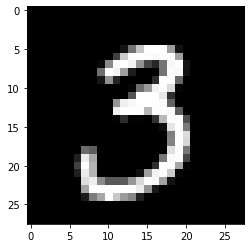

In [22]:
# Using matplotlib to display the predicted number for comparison
print("Before Reshape", X_test[90].shape)
plt.imshow(X_test[90].reshape(28, 28), cmap="gray")
print("After Reshape",X_test[90].shape)
plt.show()